In [1]:
## IT'S DANGEROUS TO GO ALONE! TAKE THIS:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


We have 

In [2]:
soil = pd.read_csv('data/soilRough.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
soil

,Date,FIPS_x,County_x,State_x,Sq_Mi_No_Drought,Sq_Mi_Abnormally_Dry,Sq_Mi_Moderate_Drought,Sq_Mi_Severe_Drought,Sq_Mi_Extreme_Drought,Sq_Mi_Exceptional_Drought,FIPSYearMonth,total_Sq_Mi,in_drought,Year_x,Month,precip,mintemp,maxtemp,avgtemp,FIPSYear,Program,Year_y,State_y,County_y,FIPS_y,Chem_expense_dollars,Chem_operations,Acres_operated,Operations,Fert_expense_dollars,Fert_operations
0,2017-12-26,5007,Benton County,AR,0.00,222.84,651.13,0.00,0.0,0.0,5007201712,873.97,1,2017,12,1.92,28.8,48.9,38.9,50072017,CENSUS,2017,ARKANSAS,BENTON,5007,1072000.0,702.0,243753.0,1936,2967000.0,798.0
1,2017-12-19,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,5007201712,873.97,1,2017,12,1.92,28.8,48.9,38.9,50072017,CENSUS,2017,ARKANSAS,BENTON,5007,1072000.0,702.0,243753.0,1936,2967000.0,798.0
2,2017-12-12,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,5007201712,873.97,1,2017,12,1.92,28.8,48.9,38.9,50072017,CENSUS,2017,ARKANSAS,BENTON,5007,1072000.0,702.0,243753.0,1936,2967000.0,798.0
3,2017-12-05,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,5007201712,873.97,1,2017,12,1.92,28.8,48.9,38.9,50072017,CENSUS,2017,ARKANSAS,BENTON,5007,1072000.0,702.0,243753.0,1936,2967000.0,798.0
4,2017-11-28,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,5007201711,873.97,1,2017,11,1.58,40.7,62.7,51.7,50072017,CENSUS,2017,ARKANSAS,BENTON,5007,1072000.0,702.0,243753.0,1936,2967000.0,798.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,53029200201,213.97,0,2002,1,3.90,36.6,45.6,41.1,530292002,CENSUS,2002,WASHINGTON,ISLAND,53029,85000.0,70.0,15018.0,348,135000.0,72.0
307017,2002-01-22,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,53029200201,213.97,0,2002,1,3.90,36.6,45.6,41.1,530292002,CENSUS,2002,WASHINGTON,ISLAND,53029,85000.0,70.0,15018.0,348,135000.0,72.0
307018,2002-01-15,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,53029200201,213.97,0,2002,1,3.90,36.6,45.6,41.1,530292002,CENSUS,2002,WASHINGTON,ISLAND,53029,85000.0,70.0,15018.0,348,135000.0,72.0
307019,2002-01-08,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,53029200201,213.97,0,2002,1,3.90,36.6,45.6,41.1,530292002,CENSUS,2002,WASHINGTON,ISLAND,53029,85000.0,70.0,15018.0,348,135000.0,72.0


In [3]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307021 entries, 0 to 307020
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       307021 non-null  object 
 1   FIPS_x                     307021 non-null  int64  
 2   County_x                   307021 non-null  object 
 3   State_x                    307021 non-null  object 
 4   Sq_Mi_No_Drought           307021 non-null  float64
 5   Sq_Mi_Abnormally_Dry       307021 non-null  float64
 6   Sq_Mi_Moderate_Drought     307021 non-null  float64
 7   Sq_Mi_Severe_Drought       307021 non-null  float64
 8   Sq_Mi_Extreme_Drought      307021 non-null  float64
 9   Sq_Mi_Exceptional_Drought  307021 non-null  float64
 10  FIPSYearMonth              307021 non-null  int64  
 11  total_Sq_Mi                307021 non-null  float64
 12  in_drought                 307021 non-null  int64  
 13  Year_x                     30

In [4]:
soil = soil.drop(columns=['Year_y', 'State_y', 'County_y', 'FIPS_y', 'FIPSYearMonth', 'FIPSYear', 'Program'])
soil

,Date,FIPS_x,County_x,State_x,Sq_Mi_No_Drought,Sq_Mi_Abnormally_Dry,Sq_Mi_Moderate_Drought,Sq_Mi_Severe_Drought,Sq_Mi_Extreme_Drought,Sq_Mi_Exceptional_Drought,total_Sq_Mi,in_drought,Year_x,Month,precip,mintemp,maxtemp,avgtemp,Chem_expense_dollars,Chem_operations,Acres_operated,Operations,Fert_expense_dollars,Fert_operations
0,2017-12-26,5007,Benton County,AR,0.00,222.84,651.13,0.00,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0
1,2017-12-19,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0
2,2017-12-12,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0
3,2017-12-05,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0
4,2017-11-28,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0
307017,2002-01-22,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0
307018,2002-01-15,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0
307019,2002-01-08,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0


In [5]:
soil = soil.rename(columns = {'FIPS_x':'FIPS',
                       'County_x':'County',
                       'State_x':'State',
                       'Year_x':'Year',
                       'precip':'monthly_precip',
                       'Chem_expense_dollars':'yearly_chem_dollars',
                       'Fert_expense_dollars':'yearly_fert_dollars'})

In [6]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307021 entries, 0 to 307020
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       307021 non-null  object 
 1   FIPS                       307021 non-null  int64  
 2   County                     307021 non-null  object 
 3   State                      307021 non-null  object 
 4   Sq_Mi_No_Drought           307021 non-null  float64
 5   Sq_Mi_Abnormally_Dry       307021 non-null  float64
 6   Sq_Mi_Moderate_Drought     307021 non-null  float64
 7   Sq_Mi_Severe_Drought       307021 non-null  float64
 8   Sq_Mi_Extreme_Drought      307021 non-null  float64
 9   Sq_Mi_Exceptional_Drought  307021 non-null  float64
 10  total_Sq_Mi                307021 non-null  float64
 11  in_drought                 307021 non-null  int64  
 12  Year                       307021 non-null  int64  
 13  Month                      30

Lets load in the wikipedia table we had for all of the counties in the us way back in the data acquisition phase--this will let us incorporate latitude and longitude data for our counties.

In [7]:
fips_table = pd.read_csv('data/roughFIPSandClimDiv_df.csv')
fips_table

,CLIMDIV_ID,FIPS,Sort [1],State,County [2],County Seat(s) [3],Population(2010),Land Areakm²,Land Areami²,Water Areakm²,Water Areami²,Total Areakm²,Total Areami²,Latitude,Longitude
0,101.0,1033,17.0,AL,Colbert,Tuscumbia,54428.0,1534.877,592.619,76.431,29.510,1611.308,622.129,+34.703112°,–87.801457°
1,101.0,1059,30.0,AL,Franklin,Russellville,31704.0,1641.588,633.821,32.898,12.702,1674.486,646.523,+34.441988°,–87.842815°
2,101.0,1077,39.0,AL,Lauderdale,Florence,92709.0,1729.328,667.697,138.027,53.293,1867.355,720.990,+34.904122°,–87.650997°
3,101.0,1079,40.0,AL,Lawrence,Moulton,34339.0,1788.847,690.678,68.688,26.521,1857.535,717.199,+34.529776°,–87.321865°
4,101.0,1083,42.0,AL,Limestone,Athens,82782.0,1450.228,559.936,122.382,47.252,1572.610,607.188,+34.810239°,–86.981400°
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,NaN,26083,1273.0,MI,Keweenaw,Eagle River,2156.0,1398.883,540.112,14053.476,5426.078,15452.359,5966.190,+47.681981°,–88.148802°
3141,NaN,46102,2418.0,SD,Oglala Lakota [11],— [11],13586.0,5423.170,2093.898,7.126,2.751,5430.296,2096.649,+43.341937°,–102.559480°
3142,NaN,48007,2527.0,TX,Aransas,Rockport,23158.0,652.869,252.074,714.621,275.917,1367.490,527.991,+28.104225°,–96.977983°
3143,NaN,51735,2943.0,VA,Poquoson [9],—,12150.0,39.670,15.317,163.452,63.109,203.122,78.426,+37.128360°,–76.303534°


In [8]:
soil['State'].unique()

array(['AR', 'CA', 'FL', 'GA', 'IL', 'IN', 'IA', 'KS', 'MN', 'MO', 'NE',
       'NC', 'TX', 'WA', 'WI'], dtype=object)

In [9]:
stateList = ['AR', 'CA', 'FL', 'GA', 'IL', 'IN', 'IA', 'KS', 'MN', 'MO', 'NE',
       'NC', 'TX', 'WA', 'WI']

In [10]:
fips_table[fips_table['State'].isin(stateList)]

,CLIMDIV_ID,FIPS,Sort [1],State,County [2],County Seat(s) [3],Population(2010),Land Areakm²,Land Areami²,Water Areakm²,Water Areami²,Total Areakm²,Total Areami²,Latitude,Longitude
82,301.0,5007,115.0,AR,Benton,Bentonville,221339.0,2194.645,847.357,94.662,36.549,2289.307,883.906,+36.337825°,–94.256187°
83,301.0,5009,116.0,AR,Boone,Harrison,36903.0,1528.692,590.231,30.044,11.600,1558.737,601.831,+36.304308°,–93.079204°
84,301.0,5015,119.0,AR,Carroll,"Berryville, Eureka Springs",27446.0,1631.917,630.087,22.566,8.713,1654.484,638.800,+36.337774°,–93.541663°
85,301.0,5087,155.0,AR,Madison,Huntsville,15717.0,2160.711,834.255,7.316,2.825,2168.028,837.080,+36.012545°,–93.724053°
86,301.0,5101,162.0,AR,Newton,Jasper,8330.0,2126.110,820.896,5.932,2.290,2132.042,823.186,+35.910063°,–93.215084°
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,4709.0,55127,3113.0,WI,Walworth,Elkhorn,102228.0,1437.771,555.127,55.507,21.431,1493.279,576.558,+42.668110°,–88.541731°
3078,4709.0,55131,3115.0,WI,Washington,West Bend,131887.0,1115.515,430.703,13.005,5.021,1128.520,435.724,+43.391156°,–88.232917°
3079,4709.0,55133,3116.0,WI,Waukesha,Waukesha,389891.0,1423.389,549.574,80.347,31.022,1503.736,580.596,+43.019308°,–88.306707°
3142,NaN,48007,2527.0,TX,Aransas,Rockport,23158.0,652.869,252.074,714.621,275.917,1367.490,527.991,+28.104225°,–96.977983°


In [11]:
fips_15table = fips_table[fips_table['State'].isin(stateList)]
fips_15table

,CLIMDIV_ID,FIPS,Sort [1],State,County [2],County Seat(s) [3],Population(2010),Land Areakm²,Land Areami²,Water Areakm²,Water Areami²,Total Areakm²,Total Areami²,Latitude,Longitude
82,301.0,5007,115.0,AR,Benton,Bentonville,221339.0,2194.645,847.357,94.662,36.549,2289.307,883.906,+36.337825°,–94.256187°
83,301.0,5009,116.0,AR,Boone,Harrison,36903.0,1528.692,590.231,30.044,11.600,1558.737,601.831,+36.304308°,–93.079204°
84,301.0,5015,119.0,AR,Carroll,"Berryville, Eureka Springs",27446.0,1631.917,630.087,22.566,8.713,1654.484,638.800,+36.337774°,–93.541663°
85,301.0,5087,155.0,AR,Madison,Huntsville,15717.0,2160.711,834.255,7.316,2.825,2168.028,837.080,+36.012545°,–93.724053°
86,301.0,5101,162.0,AR,Newton,Jasper,8330.0,2126.110,820.896,5.932,2.290,2132.042,823.186,+35.910063°,–93.215084°
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,4709.0,55127,3113.0,WI,Walworth,Elkhorn,102228.0,1437.771,555.127,55.507,21.431,1493.279,576.558,+42.668110°,–88.541731°
3078,4709.0,55131,3115.0,WI,Washington,West Bend,131887.0,1115.515,430.703,13.005,5.021,1128.520,435.724,+43.391156°,–88.232917°
3079,4709.0,55133,3116.0,WI,Waukesha,Waukesha,389891.0,1423.389,549.574,80.347,31.022,1503.736,580.596,+43.019308°,–88.306707°
3142,NaN,48007,2527.0,TX,Aransas,Rockport,23158.0,652.869,252.074,714.621,275.917,1367.490,527.991,+28.104225°,–96.977983°


In [12]:
fips_15table[['FIPS', 'Latitude', 'Longitude']]

,FIPS,Latitude,Longitude
82,5007,+36.337825°,–94.256187°
83,5009,+36.304308°,–93.079204°
84,5015,+36.337774°,–93.541663°
85,5087,+36.012545°,–93.724053°
86,5101,+35.910063°,–93.215084°
...,...,...,...
3077,55127,+42.668110°,–88.541731°
3078,55131,+43.391156°,–88.232917°
3079,55133,+43.019308°,–88.306707°
3142,48007,+28.104225°,–96.977983°


In [13]:
latlong15 = fips_15table[['FIPS', 'Latitude', 'Longitude']]
latlong15

,FIPS,Latitude,Longitude
82,5007,+36.337825°,–94.256187°
83,5009,+36.304308°,–93.079204°
84,5015,+36.337774°,–93.541663°
85,5087,+36.012545°,–93.724053°
86,5101,+35.910063°,–93.215084°
...,...,...,...
3077,55127,+42.668110°,–88.541731°
3078,55131,+43.391156°,–88.232917°
3079,55133,+43.019308°,–88.306707°
3142,48007,+28.104225°,–96.977983°


In [14]:
soil.merge(latlong15, on='FIPS')

,Date,FIPS,County,State,Sq_Mi_No_Drought,Sq_Mi_Abnormally_Dry,Sq_Mi_Moderate_Drought,Sq_Mi_Severe_Drought,Sq_Mi_Extreme_Drought,Sq_Mi_Exceptional_Drought,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Latitude,Longitude
0,2017-12-26,5007,Benton County,AR,0.00,222.84,651.13,0.00,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°
1,2017-12-19,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°
2,2017-12-12,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°
3,2017-12-05,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°
4,2017-11-28,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°
307017,2002-01-22,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°
307018,2002-01-15,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°
307019,2002-01-08,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°


In [15]:
soil = soil.merge(latlong15, on='FIPS')

On second glance, latitude and longitude appear to have some extra characters taht will make it difficult(...impossible) to convert them directly to floats. We can get our trusty 'extract' function and use regex to grab the data we need and then reformat the new columns so they can convert to floats

In [16]:
#checking it did the right thing
soil['Latitude'].str.extract('(.{1})(.{9})(.{1})')

,0,1,2
0,+,36.337825,°
1,+,36.337825,°
2,+,36.337825,°
3,+,36.337825,°
4,+,36.337825,°
...,...,...,...
307016,+,48.158436,°
307017,+,48.158436,°
307018,+,48.158436,°
307019,+,48.158436,°


In [17]:
#adding new columns for latitude
soil[['plus', 'Lat', 'dot']] = soil['Latitude'].str.extract('(.{1})(.{9})(.{1})')

In [18]:
#checking the extraction for longitude
soil['Longitude'].str.extract('(.{10})(.{1})')

,0,1
0,–94.256187,°
1,–94.256187,°
2,–94.256187,°
3,–94.256187,°
4,–94.256187,°
...,...,...
307016,–122.67050,3
307017,–122.67050,3
307018,–122.67050,3
307019,–122.67050,3


In [19]:
#adding new columns for longitude
soil[['Long', 'dot1']] = soil['Longitude'].str.extract('(.{10})(.{1})')
soil

,Date,FIPS,County,State,Sq_Mi_No_Drought,Sq_Mi_Abnormally_Dry,Sq_Mi_Moderate_Drought,Sq_Mi_Severe_Drought,Sq_Mi_Extreme_Drought,Sq_Mi_Exceptional_Drought,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Latitude,Longitude,plus,Lat,dot,Long,dot1
0,2017-12-26,5007,Benton County,AR,0.00,222.84,651.13,0.00,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,–94.256187,°
1,2017-12-19,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,–94.256187,°
2,2017-12-12,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,–94.256187,°
3,2017-12-05,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,–94.256187,°
4,2017-11-28,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,–94.256187,°
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°,+,48.158436,°,–122.67050,3
307017,2002-01-22,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°,+,48.158436,°,–122.67050,3
307018,2002-01-15,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°,+,48.158436,°,–122.67050,3
307019,2002-01-08,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°,+,48.158436,°,–122.67050,3


In [20]:
soil['dot'].unique()

array(['°'], dtype=object)

In [21]:
soil['dot1'].unique()

array(['°', '8', '4', '1', '5', '7', '9', '3', '0', '6', '2'],
      dtype=object)

We cut off the last digit of some of the longitudes, but that is not a major concern--we should still be approximately at the center latitude and longitude of the county where the last digit was cut off. if we run into issues with longitude not having enough numerals past the decimal, we can add zeros to the end of the longitude by converting it to string and using the str.fill function.

Lets convert the new 'Lat' and 'long' columns to floats and then drop the spares.

In [22]:
#I initially tried converting the longitudes which have a weird unicode version of the negative sign
#used this to figure it out: 
# https://stackoverflow.com/questions/33287615/converting-a-pandas-dataframe-column-containing-negative-strings-into-float
soil['Long'] = soil['Long'].str.replace('–', '-').astype(float)
soil['Lat'] = soil['Lat'].astype(float)
soil

,Date,FIPS,County,State,Sq_Mi_No_Drought,Sq_Mi_Abnormally_Dry,Sq_Mi_Moderate_Drought,Sq_Mi_Severe_Drought,Sq_Mi_Extreme_Drought,Sq_Mi_Exceptional_Drought,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Latitude,Longitude,plus,Lat,dot,Long,dot1
0,2017-12-26,5007,Benton County,AR,0.00,222.84,651.13,0.00,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,-94.256187,°
1,2017-12-19,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,-94.256187,°
2,2017-12-12,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,-94.256187,°
3,2017-12-05,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,-94.256187,°
4,2017-11-28,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,-94.256187,°
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°,+,48.158436,°,-122.670500,3
307017,2002-01-22,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°,+,48.158436,°,-122.670500,3
307018,2002-01-15,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°,+,48.158436,°,-122.670500,3
307019,2002-01-08,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°,+,48.158436,°,-122.670500,3


In [23]:
soil.drop(columns=(['plus',
                   'dot',
                   'dot1',
                   'Latitude',
                   'Longitude']))

,Date,FIPS,County,State,Sq_Mi_No_Drought,Sq_Mi_Abnormally_Dry,Sq_Mi_Moderate_Drought,Sq_Mi_Severe_Drought,Sq_Mi_Extreme_Drought,Sq_Mi_Exceptional_Drought,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long
0,2017-12-26,5007,Benton County,AR,0.00,222.84,651.13,0.00,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
1,2017-12-19,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
2,2017-12-12,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
3,2017-12-05,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
4,2017-11-28,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500
307017,2002-01-22,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500
307018,2002-01-15,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500
307019,2002-01-08,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500


In [24]:
soil = soil.drop(columns=(['plus',
                   'dot',
                   'dot1',
                   'Latitude',
                   'Longitude']))
soil

,Date,FIPS,County,State,Sq_Mi_No_Drought,Sq_Mi_Abnormally_Dry,Sq_Mi_Moderate_Drought,Sq_Mi_Severe_Drought,Sq_Mi_Extreme_Drought,Sq_Mi_Exceptional_Drought,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long
0,2017-12-26,5007,Benton County,AR,0.00,222.84,651.13,0.00,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
1,2017-12-19,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
2,2017-12-12,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
3,2017-12-05,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
4,2017-11-28,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500
307017,2002-01-22,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500
307018,2002-01-15,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500
307019,2002-01-08,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500


In [25]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307021 entries, 0 to 307020
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       307021 non-null  object 
 1   FIPS                       307021 non-null  int64  
 2   County                     307021 non-null  object 
 3   State                      307021 non-null  object 
 4   Sq_Mi_No_Drought           307021 non-null  float64
 5   Sq_Mi_Abnormally_Dry       307021 non-null  float64
 6   Sq_Mi_Moderate_Drought     307021 non-null  float64
 7   Sq_Mi_Severe_Drought       307021 non-null  float64
 8   Sq_Mi_Extreme_Drought      307021 non-null  float64
 9   Sq_Mi_Exceptional_Drought  307021 non-null  float64
 10  total_Sq_Mi                307021 non-null  float64
 11  in_drought                 307021 non-null  int64  
 12  Year                       307021 non-null  int64  
 13  Month                      30

The other piece we will need in place is to create a 'day' column from the 'Date' column.

In [26]:
#adding new columns for longitude
soil[['extra', 'Day']] = soil['Date'].str.extract('(.{8})(.{2})')
soil

,Date,FIPS,County,State,Sq_Mi_No_Drought,Sq_Mi_Abnormally_Dry,Sq_Mi_Moderate_Drought,Sq_Mi_Severe_Drought,Sq_Mi_Extreme_Drought,Sq_Mi_Exceptional_Drought,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long,extra,Day
0,2017-12-26,5007,Benton County,AR,0.00,222.84,651.13,0.00,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,2017-12-,26
1,2017-12-19,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,2017-12-,19
2,2017-12-12,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,2017-12-,12
3,2017-12-05,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,2017-12-,05
4,2017-11-28,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,2017-11-,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,2002-01-,29
307017,2002-01-22,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,2002-01-,22
307018,2002-01-15,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,2002-01-,15
307019,2002-01-08,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,2002-01-,08


In [27]:
soil['Day'] = soil['Day'].astype(int)
soil

,Date,FIPS,County,State,Sq_Mi_No_Drought,Sq_Mi_Abnormally_Dry,Sq_Mi_Moderate_Drought,Sq_Mi_Severe_Drought,Sq_Mi_Extreme_Drought,Sq_Mi_Exceptional_Drought,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long,extra,Day
0,2017-12-26,5007,Benton County,AR,0.00,222.84,651.13,0.00,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,2017-12-,26
1,2017-12-19,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,2017-12-,19
2,2017-12-12,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,2017-12-,12
3,2017-12-05,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,2017-12-,5
4,2017-11-28,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,2017-11-,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,2002-01-,29
307017,2002-01-22,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,2002-01-,22
307018,2002-01-15,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,2002-01-,15
307019,2002-01-08,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,2002-01-,8


In [28]:
soil = soil.drop(columns=['extra'])

In [29]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307021 entries, 0 to 307020
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       307021 non-null  object 
 1   FIPS                       307021 non-null  int64  
 2   County                     307021 non-null  object 
 3   State                      307021 non-null  object 
 4   Sq_Mi_No_Drought           307021 non-null  float64
 5   Sq_Mi_Abnormally_Dry       307021 non-null  float64
 6   Sq_Mi_Moderate_Drought     307021 non-null  float64
 7   Sq_Mi_Severe_Drought       307021 non-null  float64
 8   Sq_Mi_Extreme_Drought      307021 non-null  float64
 9   Sq_Mi_Exceptional_Drought  307021 non-null  float64
 10  total_Sq_Mi                307021 non-null  float64
 11  in_drought                 307021 non-null  int64  
 12  Year                       307021 non-null  int64  
 13  Month                      30

We can rewrite our full dataframe to csv with lat and long incorporated into it. We likely wont need the 6 columns related to the area in drought at each drought level, but this way we can pull it up if need be and drop the columns from our working dataframe.

In [30]:
soil.to_csv('soilFull.csv', index=False)

In [31]:
soil = soil.drop(columns=['Sq_Mi_No_Drought',
                   'Sq_Mi_Abnormally_Dry',
                   'Sq_Mi_Moderate_Drought',
                   'Sq_Mi_Severe_Drought',
                   'Sq_Mi_Extreme_Drought',
                   'Sq_Mi_Exceptional_Drought'])
soil

,Date,FIPS,County,State,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long,Day
0,2017-12-26,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,26
1,2017-12-19,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,19
2,2017-12-12,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,12
3,2017-12-05,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,5
4,2017-11-28,5007,Benton County,AR,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,29
307017,2002-01-22,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,22
307018,2002-01-15,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,15
307019,2002-01-08,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,8


In [32]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307021 entries, 0 to 307020
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 307021 non-null  object 
 1   FIPS                 307021 non-null  int64  
 2   County               307021 non-null  object 
 3   State                307021 non-null  object 
 4   total_Sq_Mi          307021 non-null  float64
 5   in_drought           307021 non-null  int64  
 6   Year                 307021 non-null  int64  
 7   Month                307021 non-null  int64  
 8   monthly_precip       307021 non-null  float64
 9   mintemp              307021 non-null  float64
 10  maxtemp              307021 non-null  float64
 11  avgtemp              307021 non-null  float64
 12  yearly_chem_dollars  307021 non-null  float64
 13  Chem_operations      307021 non-null  float64
 14  Acres_operated       307021 non-null  float64
 15  Operations       

In [33]:
soil['in_drought'].value_counts()

0    162802
1    144219
Name: in_drought, dtype: int64

In [34]:
soil['in_drought'].value_counts()[1]/(soil['in_drought'].value_counts()[1] + soil['in_drought'].value_counts()[0])

0.4697365978222988

well that ^ is very interesting... ~47% chance a county is in drought in Farmland

In [35]:
numeric_cols = list(soil.select_dtypes('number').columns)
numeric_cols

['FIPS',
 'total_Sq_Mi',
 'in_drought',
 'Year',
 'Month',
 'monthly_precip',
 'mintemp',
 'maxtemp',
 'avgtemp',
 'yearly_chem_dollars',
 'Chem_operations',
 'Acres_operated',
 'Operations',
 'yearly_fert_dollars',
 'Fert_operations',
 'Lat',
 'Long',
 'Day']

In [36]:
soilClean = soil[numeric_cols].copy()
soilClean

,FIPS,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long,Day
0,5007,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,26
1,5007,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,19
2,5007,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,12
3,5007,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,5
4,5007,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,53029,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,29
307017,53029,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,22
307018,53029,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,15
307019,53029,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,8


Now let's iterate through each variable and plot it as a histogram so we can get a sense of our distributions

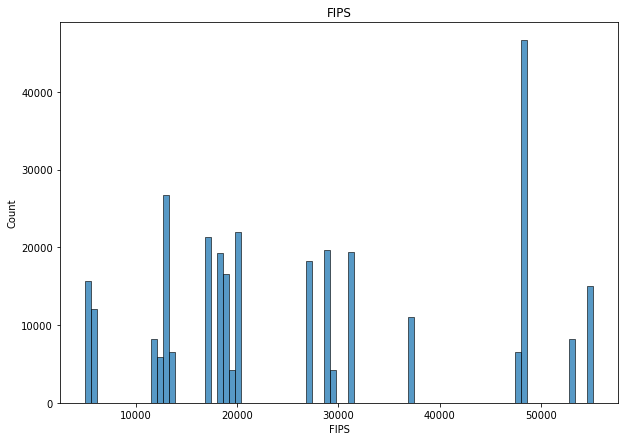

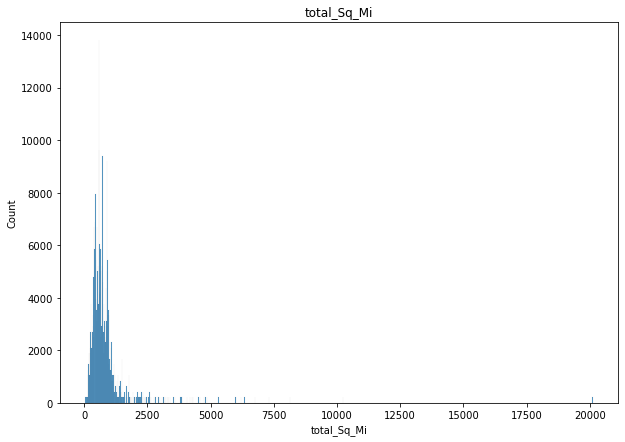

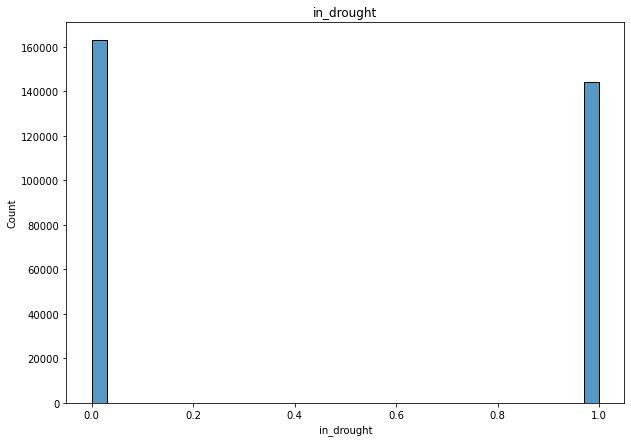

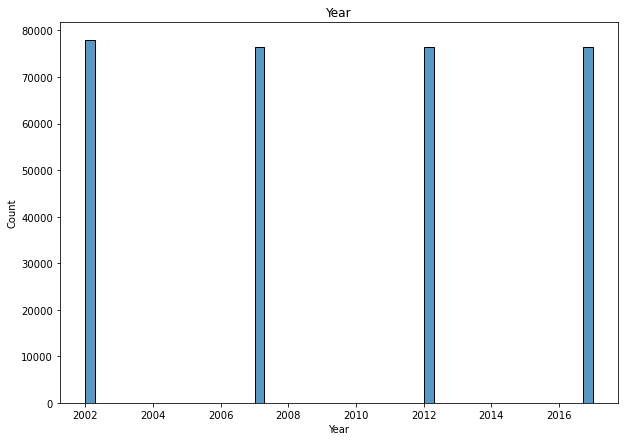

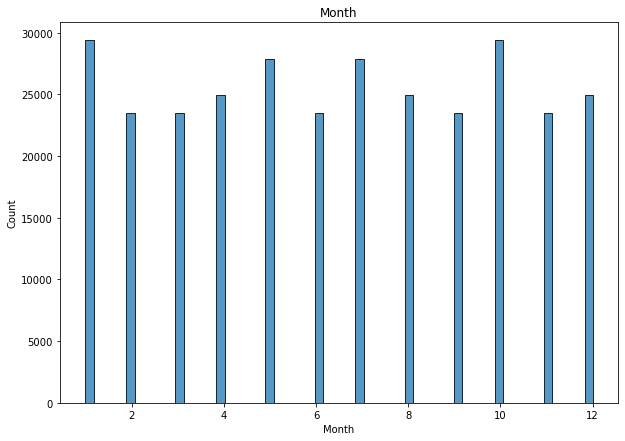

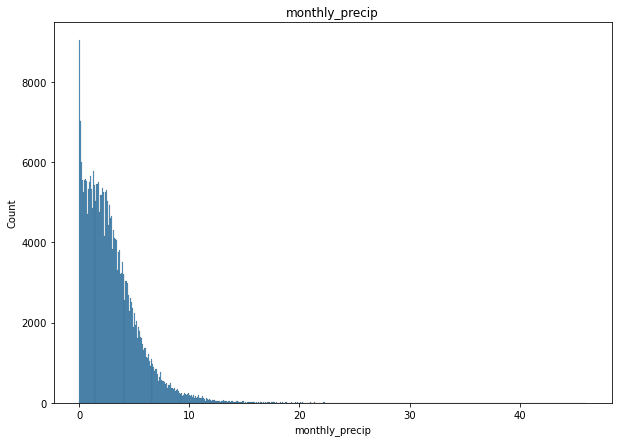

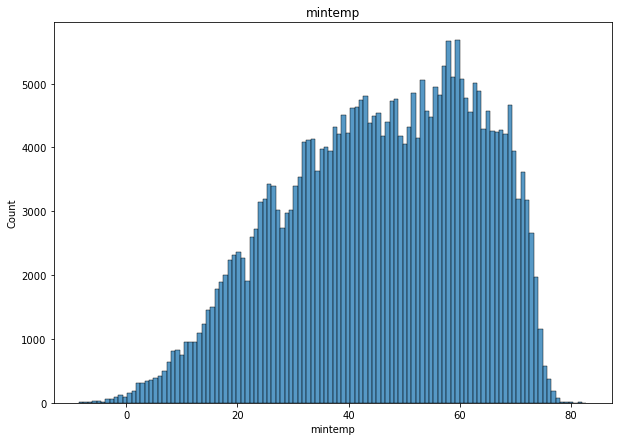

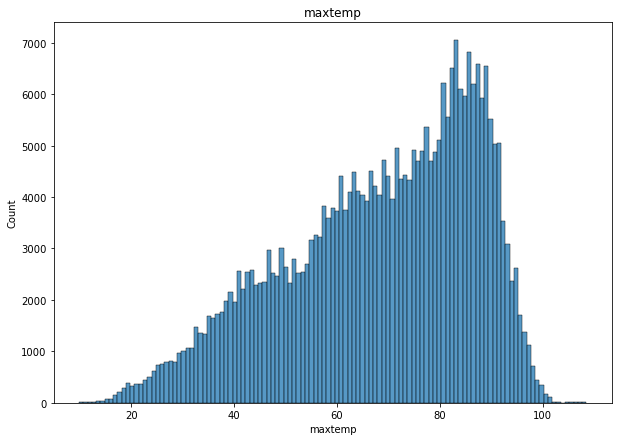

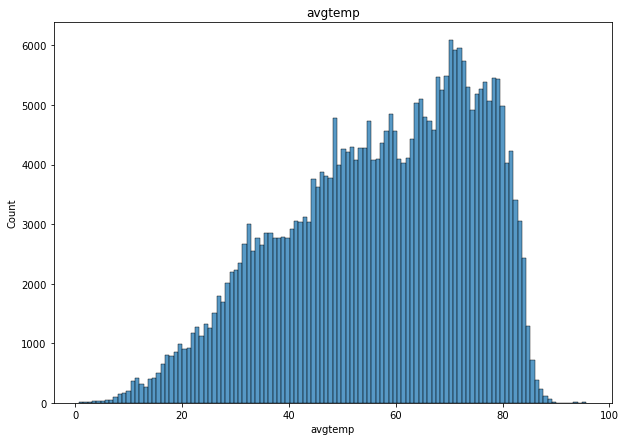

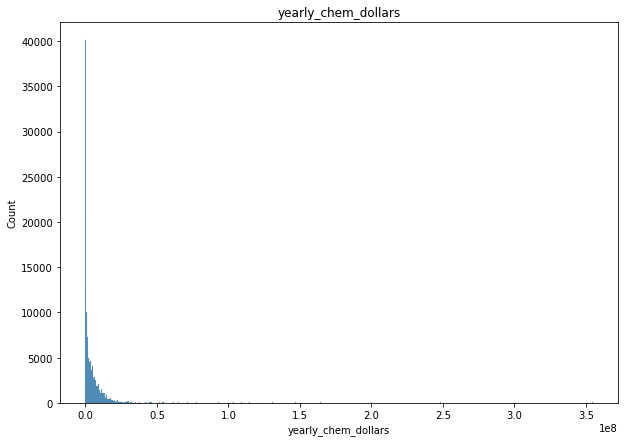

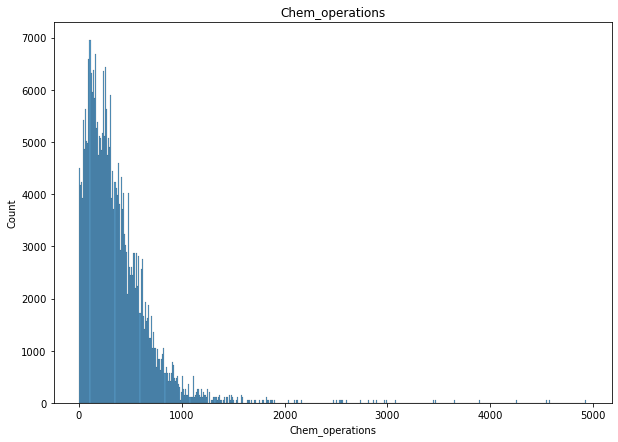

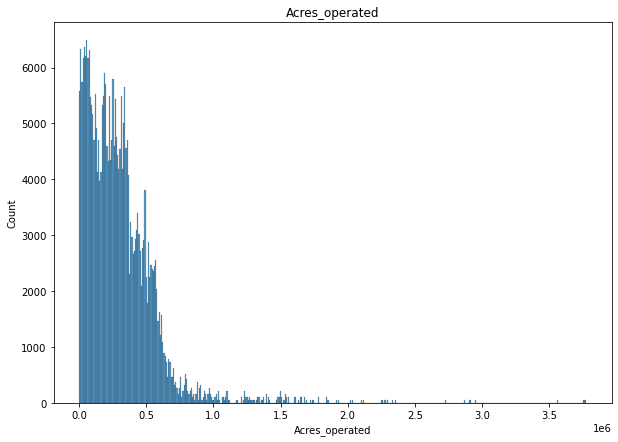

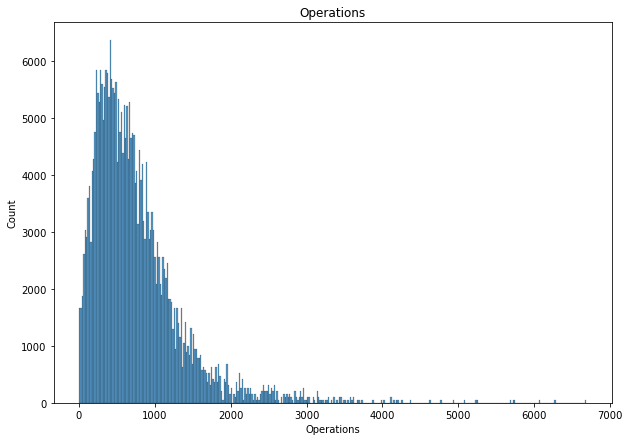

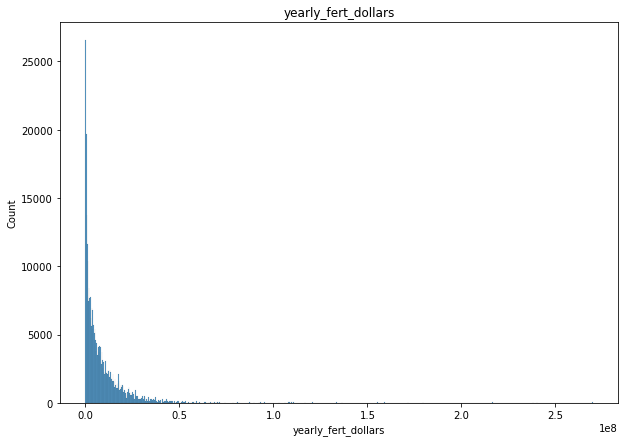

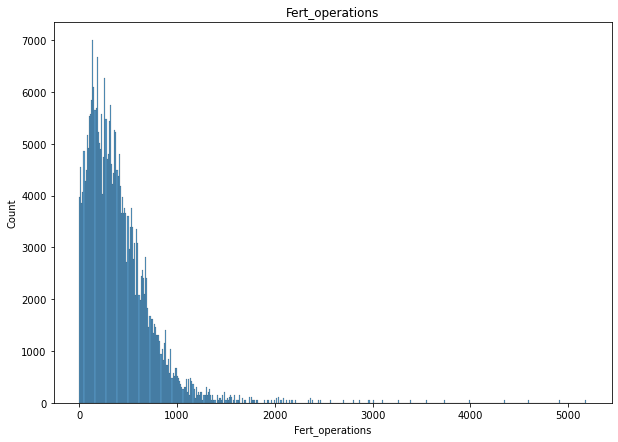

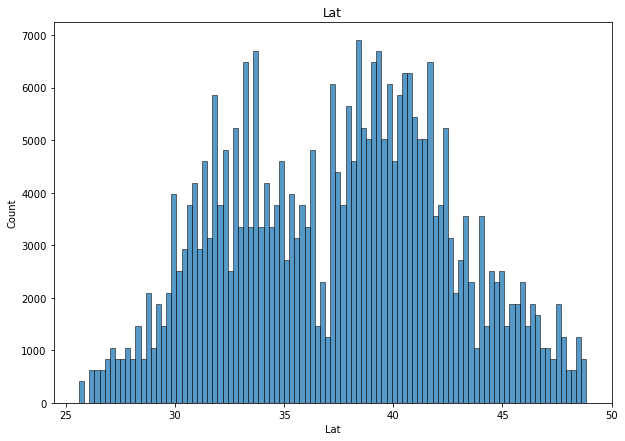

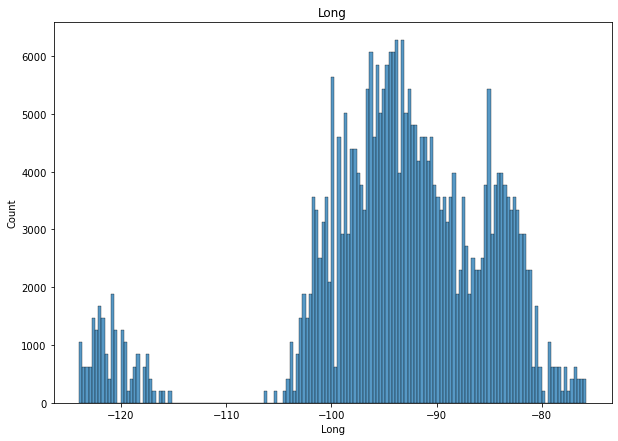

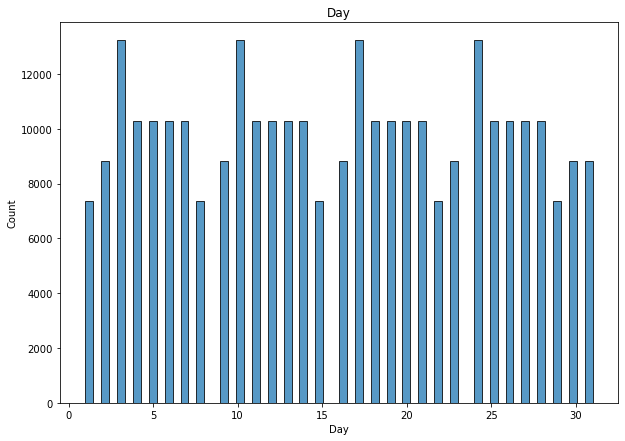

In [37]:
plt.rcParams['figure.figsize'] = (10.0, 7.0)
for column in soilClean.columns:
    sns.histplot(x=column, data=soilClean)
    plt.title(column)
    plt.show()

We can also check how the columns relate to each other by checking correlations

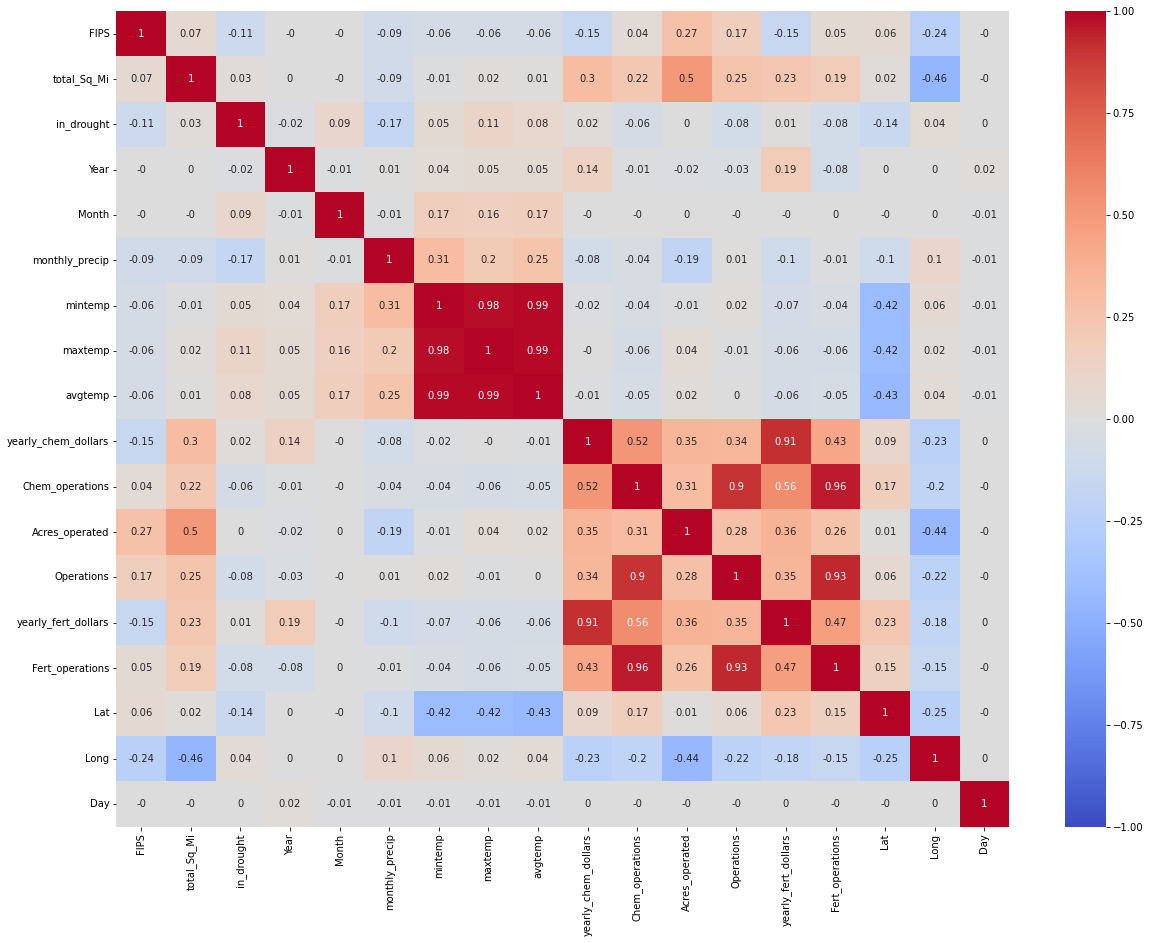

In [38]:
plt.rcParams['figure.figsize'] = (20.0, 15.0)
sns.heatmap(soilClean.corr().round(2), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()




in order to avoid issues with multicollinearity for a logistic regression, we may need to remove some of these columns. Our Decision Tree (and eventual Random Forest) models will be fine with all of the columns included.

We will likely keep the 'operations' column and drop the 'chem_operations' and 'fert_operations' due to their high correlation. For the weather data, We should be able to keep the monthly precipitation data but we will *definitely* need to choose one measure of temperature and drop the other two--correlations of .99 and .98 will cause issues with multicollinearity. maxtemp seems to have the strongest correlation with drought, so that is the top option for now.

Finally, we will need to do something

We can also use the Pearson R test to figure out which of these correlations are statistically significant and this may help us decide on how to handle strongly correlated variables. Any P-Values below .05 are considered significant with the Pearson R test.

In [39]:
soilClean_noDrought = soilClean.drop(columns='in_drought')

In [40]:
from scipy import stats
for col in soilClean_noDrought:
    corr, p = stats.pearsonr(soilClean_noDrought[col], soilClean['in_drought'])
    print(f' {col}\n Correlation coefficient: {corr}\n P-value: {p} \n')

 FIPS
 Correlation coefficient: -0.10519690498330275
 P-value: 0.0 

 total_Sq_Mi
 Correlation coefficient: 0.028426543156861436
 P-value: 6.435114598928318e-56 

 Year
 Correlation coefficient: -0.016642080127289505
 P-value: 2.9190780056342444e-20 

 Month
 Correlation coefficient: 0.08997236897308186
 P-value: 0.0 

 monthly_precip
 Correlation coefficient: -0.17410318778180298
 P-value: 0.0 

 mintemp
 Correlation coefficient: 0.04925474687766268
 P-value: 3.3841331642508703e-164 

 maxtemp
 Correlation coefficient: 0.10604506141435022
 P-value: 0.0 

 avgtemp
 Correlation coefficient: 0.07926141198122624
 P-value: 0.0 

 yearly_chem_dollars
 Correlation coefficient: 0.015455514259268447
 P-value: 1.0873813443233247e-17 

 Chem_operations
 Correlation coefficient: -0.05532787218042455
 P-value: 1.043830963544085e-206 

 Acres_operated
 Correlation coefficient: 0.0020215370204287667
 P-value: 0.26266277872367705 

 Operations
 Correlation coefficient: -0.07793826212865493
 P-value: 

Almost all of our variables have significant correlations with drought. Acres_operated has a higher p-value of .26 and does not appear to besignificantly related to our drought condition. We do not have very *strong* correlations--monthly_precip, lat, and maxtemp have the strongest relationships with drought, at -.174, -.137, and .106, respectively.

In [41]:
#blanket reference for the matplotlib docs:
#https://matplotlib.org/stable/index.html
plt.rcParams['figure.figsize'] = (10.0, 7.0)

In [42]:
soil.groupby('State')['in_drought'].sum()

State
AR     6108
CA     7808
FL     7260
GA    25378
IA     7757
IL     7648
IN     5792
KS    11493
MN     7488
MO    10426
NC     7090
NE    10595
TX    23322
WA     1860
WI     4194
Name: in_drought, dtype: int64

In [43]:
soil.groupby('State')['in_drought'].count()

State
AR    15675
CA    12122
FL    14003
GA    33231
IA    20691
IL    21318
IN    19228
KS    21945
MN    18183
MO    23826
NC    11077
NE    19437
TX    53086
WA     8151
WI    15048
Name: in_drought, dtype: int64

In [44]:
stateDroughtRates = (soil.groupby('State')['in_drought'].sum())/(soil.groupby('State')['in_drought'].count())
stateDroughtRates.reset

State
AR    0.389665
CA    0.644118
FL    0.518460
GA    0.763685
IA    0.374897
IL    0.358758
IN    0.301227
KS    0.523718
MN    0.411813
MO    0.437589
NC    0.640065
NE    0.545094
TX    0.439325
WA    0.228193
WI    0.278708
Name: in_drought, dtype: float64

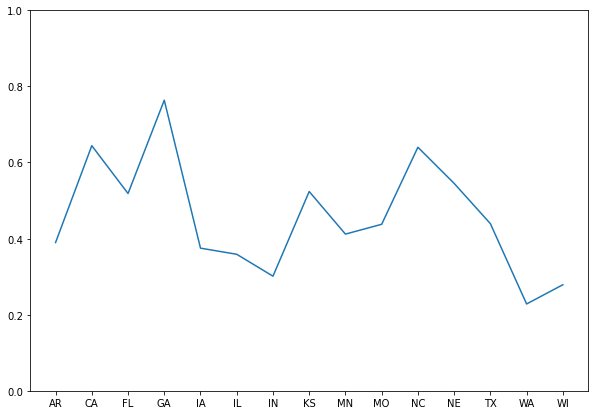

In [108]:
plt.figure()
plt.plot((soil.groupby('State')['in_drought'].sum())/(soil.groupby('State')['in_drought'].count()))
plt.ylim(0.0, 1.0)
plt.show()

In [46]:
(soil.groupby(['FIPS', 'State', 'County'])['in_drought'].sum())/(soil.groupby(['FIPS', 'State', 'County'])['in_drought'].count())

FIPS   State  County          
5001   AR     Arkansas County     0.358852
5003   AR     Ashley County       0.282297
5005   AR     Baxter County       0.473684
5007   AR     Benton County       0.459330
5009   AR     Boone County        0.483254
                                    ...   
55133  WI     Waukesha County     0.234450
55135  WI     Waupaca County      0.291866
55137  WI     Waushara County     0.215311
55139  WI     Winnebago County    0.200957
55141  WI     Wood County         0.282297
Name: in_drought, Length: 1469, dtype: float64

In [47]:
fipsDroughtRate = (
    soil.groupby(['FIPS', 'State', 'County'])['in_drought'].sum())/(
    soil.groupby(['FIPS', 'State', 'County'])['in_drought'].count())

In [48]:
_5MostDrought = fipsDroughtRate.sort_values(ascending=False).head(5)
_5MostDrought

FIPS  State  County            
6065  CA     Riverside County      0.976077
6037  CA     Los Angeles County    0.966507
6059  CA     Orange County         0.966507
6025  CA     Imperial County       0.961722
6111  CA     Ventura County        0.933014
Name: in_drought, dtype: float64

In [49]:
_5LeastDrought = fipsDroughtRate.sort_values(ascending=False).tail(5)
_5LeastDrought.sort_values()

FIPS   State  County             
53049  WA     Pacific County         0.052632
53031  WA     Jefferson County       0.071770
53027  WA     Grays Harbor County    0.071770
53069  WA     Wahkiakum County       0.071770
53009  WA     Clallam County         0.071770
Name: in_drought, dtype: float64

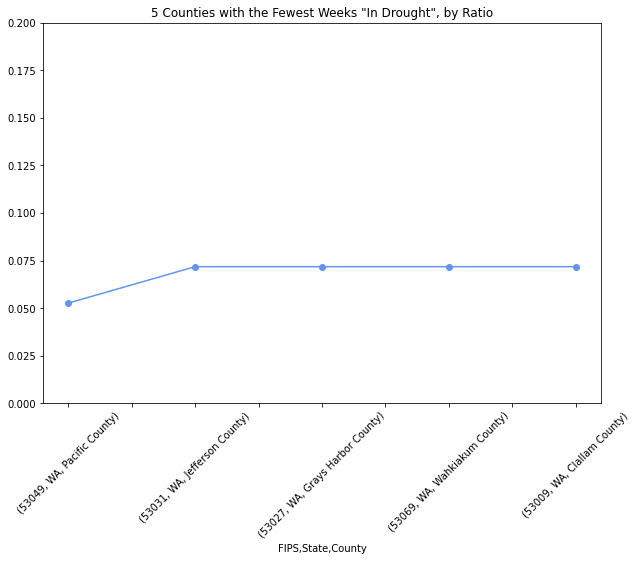

In [50]:
plt.figure()
_5LeastDrought.sort_values().plot(marker = 'o', color = 'cornflowerblue')
plt.ylim(0.0, 0.2)
plt.xticks(rotation = 45)
plt.title('5 Counties with the Fewest Weeks "In Drought", by Ratio')
plt.show()

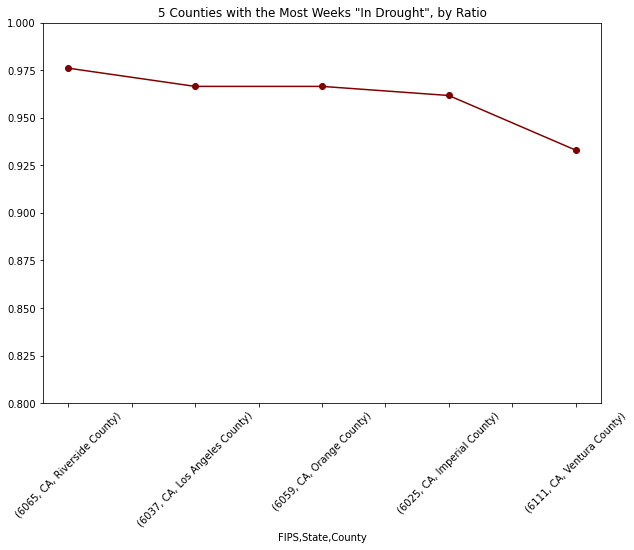

In [51]:
plt.figure()
_5MostDrought.plot(marker = 'o', color = 'maroon')
plt.ylim(.8, 1.0)
plt.xticks(rotation = 45)
plt.title('5 Counties with the Most Weeks "In Drought", by Ratio')
plt.show()

In [52]:
weekDroughtRates = (soil.groupby(['Date'])['in_drought'].sum())/(soil.groupby(['Date'])['in_drought'].count())

In [53]:
weekDroughtRates.sort_values()

Date
2017-06-06    0.132743
2017-05-23    0.155208
2017-06-20    0.162696
2017-07-11    0.164057
2017-05-02    0.166780
                ...   
2012-09-25    0.840027
2012-07-10    0.843431
2012-09-11    0.846835
2012-12-04    0.857726
2012-11-27    0.863853
Name: in_drought, Length: 209, dtype: float64

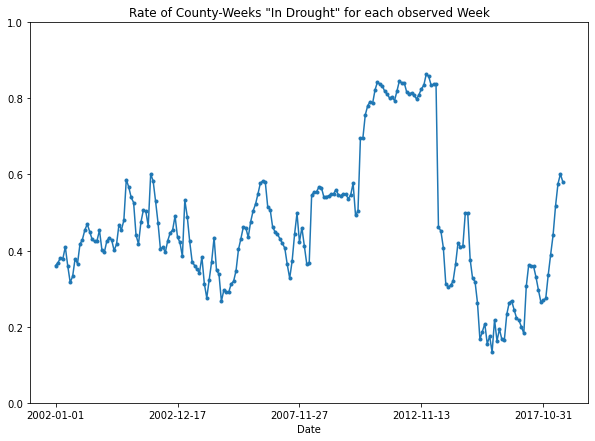

In [54]:
plt.figure()
weekDroughtRates.plot(marker='.')
plt.xticks()
plt.ylim(0,1)
plt.title('Rate of County-Weeks "In Drought" for each observed Week')
plt.show()

april showers bring may...well, lack of drought

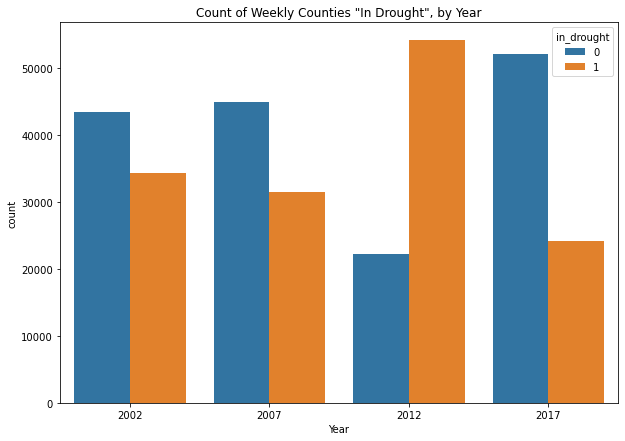

In [98]:
droughtByYear = sns.countplot(
    x = 'Year', data = soil, hue = 'in_drought')
droughtByYear.set_title('Count of Weekly Counties "In Drought", by Year')
plt.show()

In [105]:
droughtByYear.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'

2012 had the most county-weeks of drought

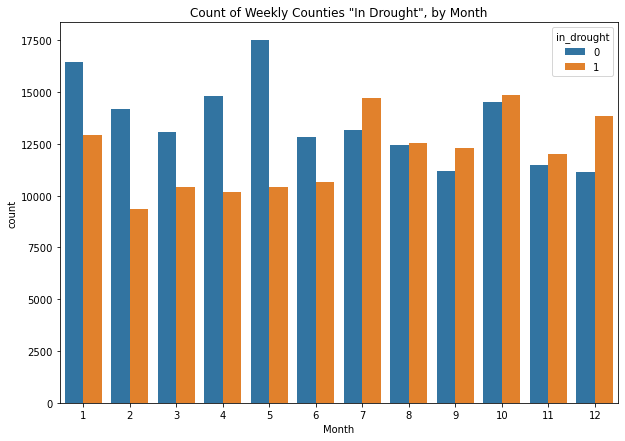

In [59]:
droughtByMonth = sns.countplot(
    x = 'Month', data = soil, hue = 'in_drought')
droughtByMonth.set_title('Count of Weekly Counties "In Drought", by Month')
plt.show()

In [55]:
monthDroughtRates = (soil.groupby(['Month'])['in_drought'].sum())/(soil.groupby(['Month'])['in_drought'].count())*100

In [56]:
monthDroughtRates

Month
1     0.440163
2     0.397592
3     0.443031
4     0.406599
5     0.373294
6     0.453753
7     0.527462
8     0.502383
9     0.522975
10    0.505446
11    0.511658
12    0.554799
Name: in_drought, dtype: float64

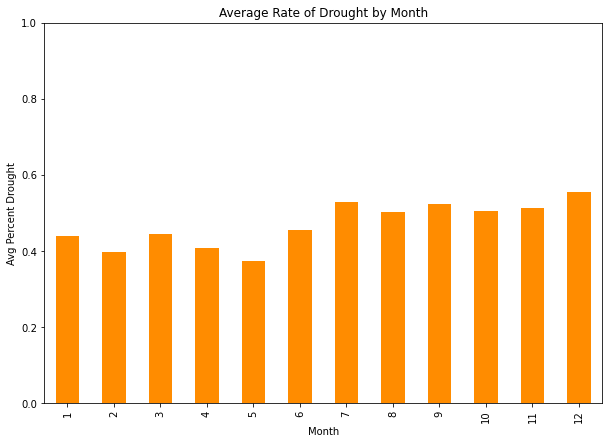

In [103]:
plt.figure()
monthDroughtRates.plot(kind='bar', color='darkorange')
plt.ylim(0,1)
plt.ylabel('Avg Percent Drought')
plt.title('Average Rate of Drought by Month')
plt.show()

In [60]:
soil.head(1)

,Date,FIPS,County,State,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long,Day
0,2017-12-26,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,26


Because our Chemical and fertilizer costs are yearly amounts applied at the weekly level, we will need to divide them by the number of weeks in the dataframe before plotting them.

In [61]:
soil['Date'].nunique()

209

In [62]:
soil.groupby('Year')['Date'].nunique()

Year
2002    53
2007    52
2012    52
2017    52
Name: Date, dtype: int64

In [63]:
yearlyChemExp_StateMillions = (soil.groupby(['State'])['yearly_chem_dollars'].sum()/209/1000000)

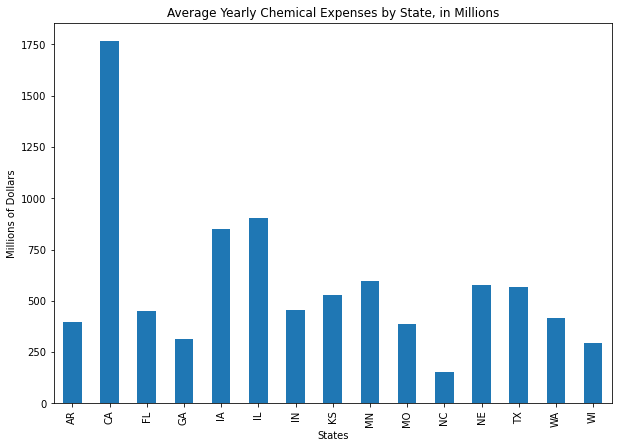

In [64]:
plt.figure()
yearlyChemExp_StateMillions.plot(kind='bar')
plt.title('Average Yearly Chemical Expenses by State, in Millions')
plt.xlabel('States')
plt.ylabel('Millions of Dollars')
plt.show()

In [65]:
yearlyFertExp_StateMillions = (soil.groupby(['State'])['yearly_fert_dollars'].sum()/209/1000000)

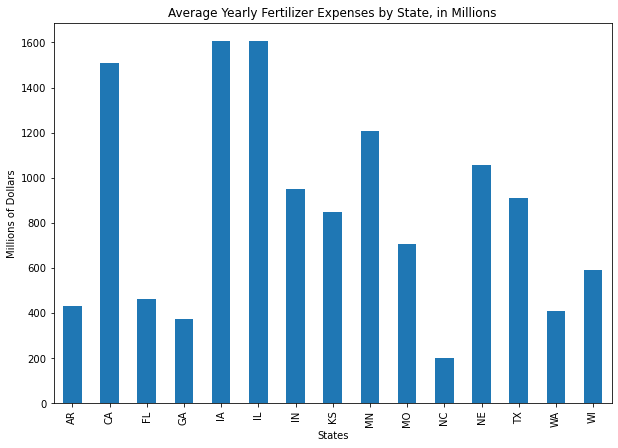

In [66]:
plt.figure()
yearlyFertExp_StateMillions.plot(kind='bar')
plt.title('Average Yearly Fertilizer Expenses by State, in Millions')
plt.xlabel('States')
plt.ylabel('Millions of Dollars')
plt.show()

In [67]:
yearlyConvAgExp_State = (soil.groupby(['State'])['yearly_fert_dollars'].sum()/209/1000000)+(
    soil.groupby(['State'])['yearly_chem_dollars'].sum()/209/1000000)
yearlyConvAgExp_State

State
AR     827.572928
CA    3274.174537
FL     915.710399
GA     689.281426
IA    2456.750780
IL    2510.747584
IN    1401.442124
KS    1377.366780
MN    1799.703254
MO    1092.956353
NC     351.753831
NE    1630.979853
TX    1477.177011
WA     825.902249
WI     883.758223
dtype: float64

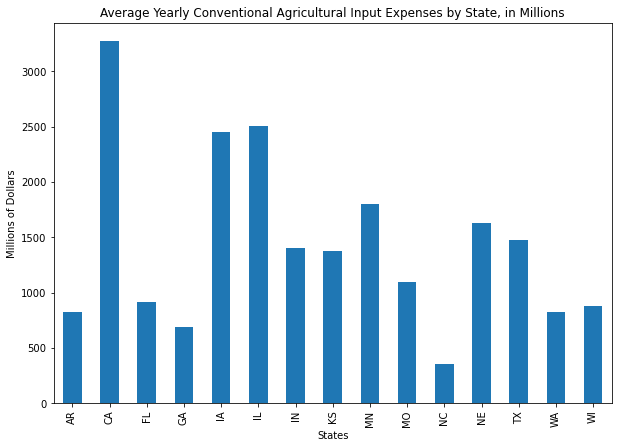

In [68]:
plt.figure()
yearlyConvAgExp_State.plot(kind='bar')
plt.title('Average Yearly Conventional Agricultural Input Expenses by State, in Millions')
plt.xlabel('States')
plt.ylabel('Millions of Dollars')
plt.show()

Next, to check the average state expenses by acre

In [69]:
yearlyAcresOp_state = soil.groupby(['State'])['Acres_operated'].sum()/209
yearlyAcresOp_state

State
AR    1.402116e+07
CA    2.577566e+07
FL    9.738909e+06
GA    1.012034e+07
IA    3.091980e+07
IL    2.700894e+07
IN    1.488141e+07
KS    4.637171e+07
MN    2.650063e+07
MO    2.876085e+07
NC    4.372575e+06
NE    4.542780e+07
TX    1.290368e+08
WA    1.493155e+07
WI    1.496613e+07
Name: Acres_operated, dtype: float64

now setting up the fertilizer dollars per acres, chem dollars per acre, combined per acre

In [70]:
yearlyFertDollars_Acres = yearlyFertExp_StateMillions*1000000/yearlyAcresOp_state
yearlyFertDollars_Acres

State
AR    30.767093
CA    58.509648
FL    47.650594
GA    36.871489
IA    51.948390
IL    59.418681
IN    63.724327
KS    18.337019
MN    45.488017
MO    24.583766
NC    45.692091
NE    23.246540
TX     7.061793
WA    27.556023
WI    39.537357
dtype: float64

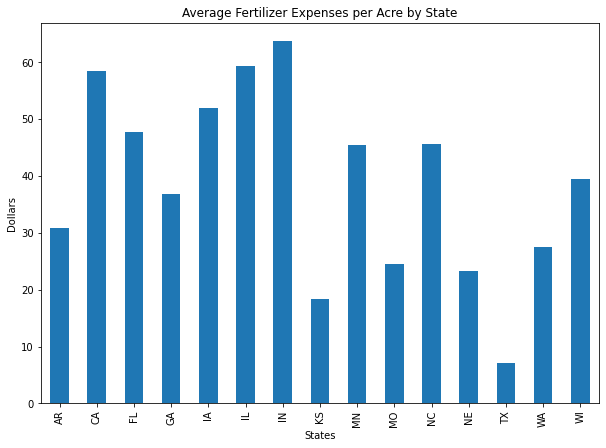

In [71]:
plt.figure()
yearlyFertDollars_Acres.plot(kind='bar')
plt.title('Average Fertilizer Expenses per Acre by State')
plt.xlabel('States')
plt.ylabel('Dollars')
plt.show()

In [72]:
yearlyChemDollars_Acres = yearlyChemExp_StateMillions*1000000/yearlyAcresOp_state
yearlyChemDollars_Acres

State
AR    28.256058
CA    68.516193
FL    46.375377
GA    31.237065
IA    27.507181
IL    33.541201
IN    30.449664
KS    11.365717
MN    22.423708
MO    13.417759
NC    34.753380
NE    12.656138
TX     4.385927
WA    27.756543
WI    19.513212
dtype: float64

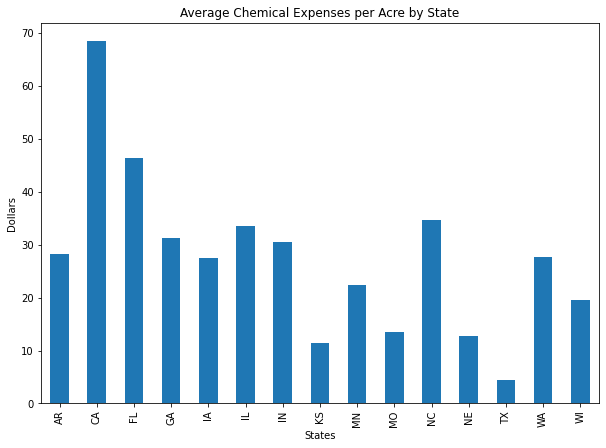

In [73]:
plt.figure()
yearlyChemDollars_Acres.plot(kind='bar')
plt.title('Average Chemical Expenses per Acre by State')
plt.xlabel('States')
plt.ylabel('Dollars')
plt.show()

In [74]:
#multiplying by 1 million to get the dollars per acre
yearlyConvAgDollars_Acres = yearlyConvAgExp_State*1000000/yearlyAcresOp_state
yearlyConvAgDollars_Acres.sort_values(ascending=False)

State
CA    127.025841
IN     94.173991
FL     94.025971
IL     92.959882
NC     80.445471
IA     79.455572
GA     68.108555
MN     67.911724
WI     59.050569
AR     59.023151
WA     55.312566
MO     38.001525
NE     35.902678
KS     29.702737
TX     11.447720
dtype: float64

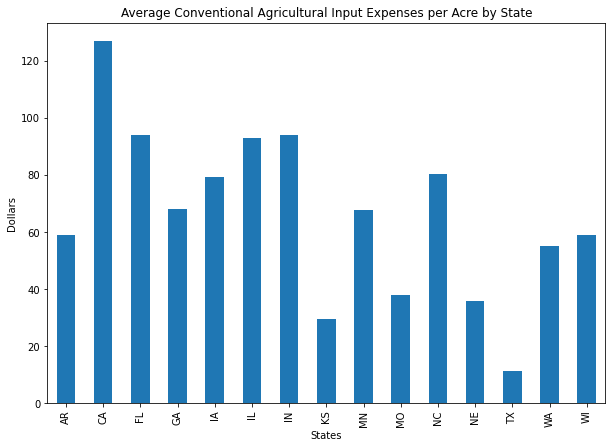

In [75]:
plt.figure()
yearlyConvAgDollars_Acres.plot(kind='bar')
plt.title('Average Conventional Agricultural Input Expenses per Acre by State')
plt.xlabel('States')
plt.ylabel('Dollars')
plt.show()

now on to the weather

In [76]:
soil

,Date,FIPS,County,State,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long,Day
0,2017-12-26,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,26
1,2017-12-19,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,19
2,2017-12-12,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,12
3,2017-12-05,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,5
4,2017-11-28,5007,Benton County,AR,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,29
307017,2002-01-22,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,22
307018,2002-01-15,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,15
307019,2002-01-08,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,8


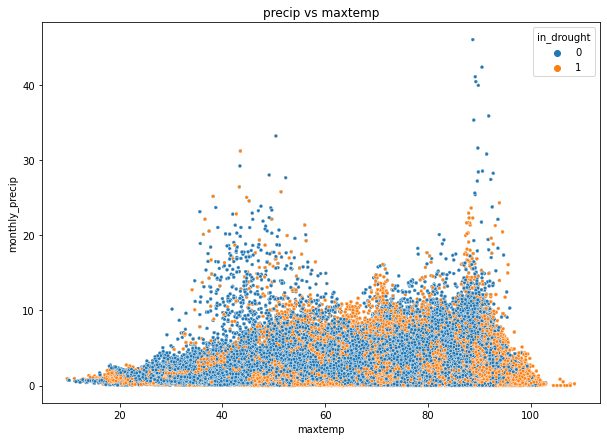

In [77]:
#COMEBACKTOTHIS
#try this plot again by state for a couple of the 'interesting' states
maxtemp_precip = sns.scatterplot(
    x = 'maxtemp',
    y = 'monthly_precip',
    hue = 'in_drought',
    data = soil,
    s=10,)
maxtemp_precip.set_title('precip vs maxtemp')
plt.show()

In [78]:
soilCali = soil[soil['State']=='CA']
soilCali

,Date,FIPS,County,State,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long,Day
15675,2017-12-26,6015,Del Norte County,CA,1020.10,0,2017,12,3.88,36.7,50.4,43.6,373566.0,23.0,19770.0,90,548000.0,23.0,41.749903,-123.98099,26
15676,2017-12-19,6015,Del Norte County,CA,1020.10,0,2017,12,3.88,36.7,50.4,43.6,373566.0,23.0,19770.0,90,548000.0,23.0,41.749903,-123.98099,19
15677,2017-12-12,6015,Del Norte County,CA,1020.10,0,2017,12,3.88,36.7,50.4,43.6,373566.0,23.0,19770.0,90,548000.0,23.0,41.749903,-123.98099,12
15678,2017-12-05,6015,Del Norte County,CA,1020.10,0,2017,12,3.88,36.7,50.4,43.6,373566.0,23.0,19770.0,90,548000.0,23.0,41.749903,-123.98099,5
15679,2017-11-28,6015,Del Norte County,CA,1020.10,0,2017,11,13.35,39.5,49.4,44.5,373566.0,23.0,19770.0,90,548000.0,23.0,41.749903,-123.98099,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27792,2002-01-29,6071,San Bernardino County,CA,20117.76,0,2002,1,0.14,36.2,59.0,47.6,3881000.0,611.0,513642.0,1386,4311000.0,655.0,34.857220,-116.18119,29
27793,2002-01-22,6071,San Bernardino County,CA,20117.76,0,2002,1,0.14,36.2,59.0,47.6,3881000.0,611.0,513642.0,1386,4311000.0,655.0,34.857220,-116.18119,22
27794,2002-01-15,6071,San Bernardino County,CA,20117.76,0,2002,1,0.14,36.2,59.0,47.6,3881000.0,611.0,513642.0,1386,4311000.0,655.0,34.857220,-116.18119,15
27795,2002-01-08,6071,San Bernardino County,CA,20117.76,0,2002,1,0.14,36.2,59.0,47.6,3881000.0,611.0,513642.0,1386,4311000.0,655.0,34.857220,-116.18119,8


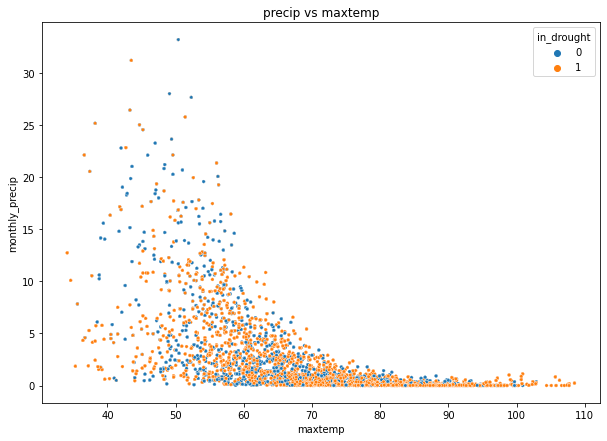

In [79]:
#trying out california
maxtemp_precip = sns.scatterplot(
    x = 'maxtemp',
    y = 'monthly_precip',
    hue = 'in_drought',
    data = soilCali,
    s=10,)
maxtemp_precip.set_title('precip vs maxtemp')
plt.show()

In [80]:
soilTexas = soil[soil['State']=='TX']
soilTexas

,Date,FIPS,County,State,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long,Day
230736,2017-12-26,48003,Andrews County,TX,1501.29,0,2017,12,0.31,30.3,58.2,44.3,1009000.0,42.0,886765.0,156,912000.0,49.0,32.312258,-102.640200,26
230737,2017-12-19,48003,Andrews County,TX,1501.29,0,2017,12,0.31,30.3,58.2,44.3,1009000.0,42.0,886765.0,156,912000.0,49.0,32.312258,-102.640200,19
230738,2017-12-12,48003,Andrews County,TX,1501.29,0,2017,12,0.31,30.3,58.2,44.3,1009000.0,42.0,886765.0,156,912000.0,49.0,32.312258,-102.640200,12
230739,2017-12-05,48003,Andrews County,TX,1501.29,0,2017,12,0.31,30.3,58.2,44.3,1009000.0,42.0,886765.0,156,912000.0,49.0,32.312258,-102.640200,5
230740,2017-11-28,48003,Andrews County,TX,1501.29,0,2017,11,0.39,42.0,71.6,56.8,1009000.0,42.0,886765.0,156,912000.0,49.0,32.312258,-102.640200,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306807,2002-01-29,48007,Aransas County,TX,337.38,0,2002,1,0.71,48.9,66.9,57.9,5000.0,16.0,50032.0,62,27000.0,25.0,28.104225,-96.977983,29
306808,2002-01-22,48007,Aransas County,TX,337.38,0,2002,1,0.71,48.9,66.9,57.9,5000.0,16.0,50032.0,62,27000.0,25.0,28.104225,-96.977983,22
306809,2002-01-15,48007,Aransas County,TX,337.38,0,2002,1,0.71,48.9,66.9,57.9,5000.0,16.0,50032.0,62,27000.0,25.0,28.104225,-96.977983,15
306810,2002-01-08,48007,Aransas County,TX,337.38,0,2002,1,0.71,48.9,66.9,57.9,5000.0,16.0,50032.0,62,27000.0,25.0,28.104225,-96.977983,8


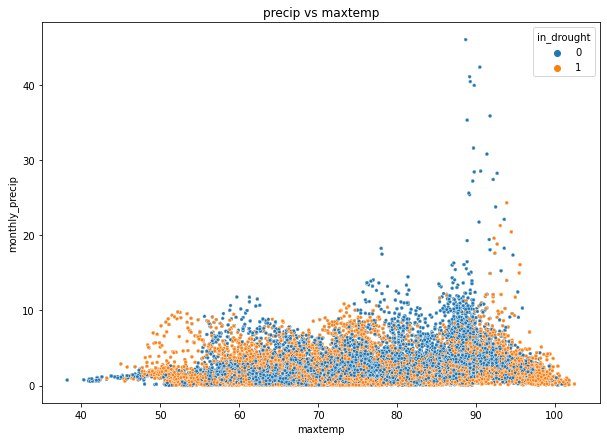

In [81]:
#and texas
maxtemp_precip = sns.scatterplot(
    x = 'maxtemp',
    y = 'monthly_precip',
    hue = 'in_drought',
    data = soilTexas,
    s=10,)
maxtemp_precip.set_title('precip vs maxtemp')
plt.show()

In [82]:
soilTexas2012 = soil[(soil['State']=='TX')& (soil['Year']==2012)]
soilTexas2012

,Date,FIPS,County,State,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long,Day
230788,2012-12-25,48003,Andrews County,TX,1501.30,1,2012,12,0.11,30.6,61.1,45.9,551000.0,36.0,752030.0,169,576000.0,56.0,32.312258,-102.640200,25
230789,2012-12-18,48003,Andrews County,TX,1501.30,1,2012,12,0.11,30.6,61.1,45.9,551000.0,36.0,752030.0,169,576000.0,56.0,32.312258,-102.640200,18
230790,2012-12-11,48003,Andrews County,TX,1501.29,1,2012,12,0.11,30.6,61.1,45.9,551000.0,36.0,752030.0,169,576000.0,56.0,32.312258,-102.640200,11
230791,2012-12-04,48003,Andrews County,TX,1501.29,1,2012,12,0.11,30.6,61.1,45.9,551000.0,36.0,752030.0,169,576000.0,56.0,32.312258,-102.640200,4
230792,2012-11-27,48003,Andrews County,TX,1501.29,1,2012,11,0.08,40.9,71.6,56.2,551000.0,36.0,752030.0,169,576000.0,56.0,32.312258,-102.640200,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306702,2012-01-31,48007,Aransas County,TX,337.38,1,2012,1,0.93,50.0,70.5,60.3,26000.0,40.0,39844.0,100,83000.0,37.0,28.104225,-96.977983,31
306703,2012-01-24,48007,Aransas County,TX,337.38,1,2012,1,0.93,50.0,70.5,60.3,26000.0,40.0,39844.0,100,83000.0,37.0,28.104225,-96.977983,24
306704,2012-01-17,48007,Aransas County,TX,337.38,1,2012,1,0.93,50.0,70.5,60.3,26000.0,40.0,39844.0,100,83000.0,37.0,28.104225,-96.977983,17
306705,2012-01-10,48007,Aransas County,TX,337.38,1,2012,1,0.93,50.0,70.5,60.3,26000.0,40.0,39844.0,100,83000.0,37.0,28.104225,-96.977983,10


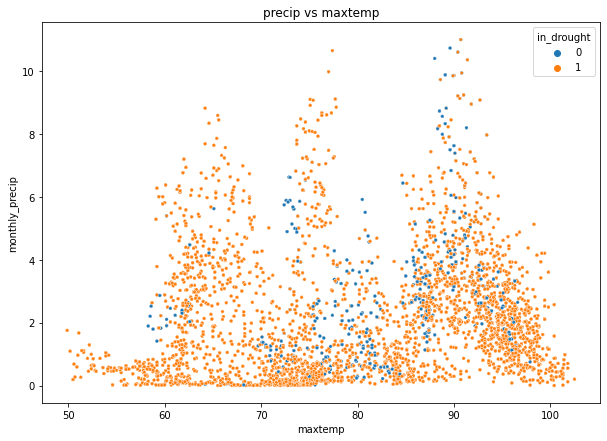

In [83]:
#and texas but only 2012
maxtemp_precip = sns.scatterplot(
    x = 'maxtemp',
    y = 'monthly_precip',
    hue = 'in_drought',
    data = soilTexas2012,
    s=10,)
maxtemp_precip.set_title('precip vs maxtemp')
plt.show()

In [84]:
soilWash2012 = soil[(soil['State']=='WA')& (soil['Year']==2012)]
soilWash2012

,Date,FIPS,County,State,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long,Day
283665,2012-12-25,53009,Clallam County,WA,1781.05,0,2012,12,17.57,34.0,41.4,37.7,128000.0,132.0,23640.0,536,494000.0,161.0,48.113009,-123.93061,25
283666,2012-12-18,53009,Clallam County,WA,1781.05,0,2012,12,17.57,34.0,41.4,37.7,128000.0,132.0,23640.0,536,494000.0,161.0,48.113009,-123.93061,18
283667,2012-12-11,53009,Clallam County,WA,1781.05,0,2012,12,17.57,34.0,41.4,37.7,128000.0,132.0,23640.0,536,494000.0,161.0,48.113009,-123.93061,11
283668,2012-12-04,53009,Clallam County,WA,1781.05,0,2012,12,17.57,34.0,41.4,37.7,128000.0,132.0,23640.0,536,494000.0,161.0,48.113009,-123.93061,4
283669,2012-11-27,53009,Clallam County,WA,1781.05,0,2012,11,14.07,37.1,47.6,42.3,128000.0,132.0,23640.0,536,494000.0,161.0,48.113009,-123.93061,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306911,2012-01-31,53029,Island County,WA,213.97,0,2012,1,3.44,34.1,44.4,39.2,168000.0,127.0,15249.0,377,481000.0,146.0,48.158436,-122.67050,31
306912,2012-01-24,53029,Island County,WA,213.97,0,2012,1,3.44,34.1,44.4,39.2,168000.0,127.0,15249.0,377,481000.0,146.0,48.158436,-122.67050,24
306913,2012-01-17,53029,Island County,WA,213.97,0,2012,1,3.44,34.1,44.4,39.2,168000.0,127.0,15249.0,377,481000.0,146.0,48.158436,-122.67050,17
306914,2012-01-10,53029,Island County,WA,213.97,0,2012,1,3.44,34.1,44.4,39.2,168000.0,127.0,15249.0,377,481000.0,146.0,48.158436,-122.67050,10


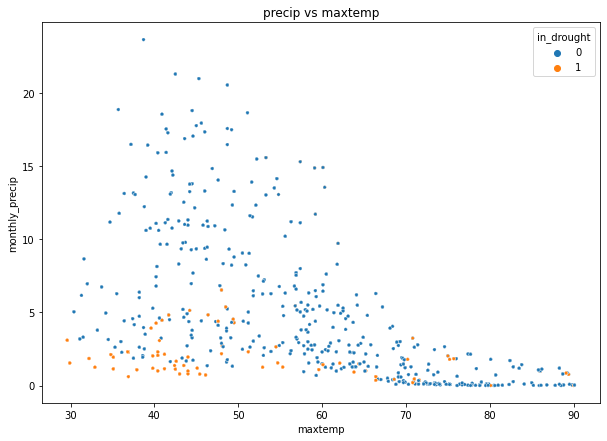

In [85]:
#and then washington for 2012
maxtemp_precip = sns.scatterplot(
    x = 'maxtemp',
    y = 'monthly_precip',
    hue = 'in_drought',
    data = soilWash2012,
    s=10,)
maxtemp_precip.set_title('precip vs maxtemp')
plt.show()

From the correlation heatmap we know that the fertilizer and chemical expenses and operations are very strongly correlated. Because of this correlation, we will need to remove some of these columns to avoid multicollinearity issues. This removal is less of a worry for the operations features as they are not quite as pertinent to our end goal of examining the costs of conventional agriculture inputs and the likelihood of drought.

For the Chemical and fertilizer expenses instead of *removing* one, we can combine them into one column. The expenses related to chemicals or fertilizers have been our way to measure the level of conventional agriculture practices for different counties or states. It makes sense to combine these into one column to serve as our operational means of measuring conventional ag practices: yearly_conv_input_exp

We will take a look at it's Pearson R test with 'in_drought' to get a sense for their relationship and set up a histogram for it to check distribution.

In [86]:
soil['yearly_conv_input_exp'] = soil['yearly_chem_dollars'] + soil['yearly_fert_dollars']
soil

,Date,FIPS,County,State,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long,Day,yearly_conv_input_exp
0,2017-12-26,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,26,4039000.0
1,2017-12-19,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,19,4039000.0
2,2017-12-12,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,12,4039000.0
3,2017-12-05,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,5,4039000.0
4,2017-11-28,5007,Benton County,AR,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,28,4039000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,29,220000.0
307017,2002-01-22,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,22,220000.0
307018,2002-01-15,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,15,220000.0
307019,2002-01-08,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,8,220000.0


In [87]:
corr, p = stats.pearsonr(soil['yearly_conv_input_exp'], soil['in_drought'])
print(f'Yearly Conventional Input Expenses\n Correlation coefficient: {corr}\n P-value: {p} \n')

Yearly Conventional Input Expenses
 Correlation coefficient: 0.014433397441306842
 P-value: 1.2660651944449923e-15 



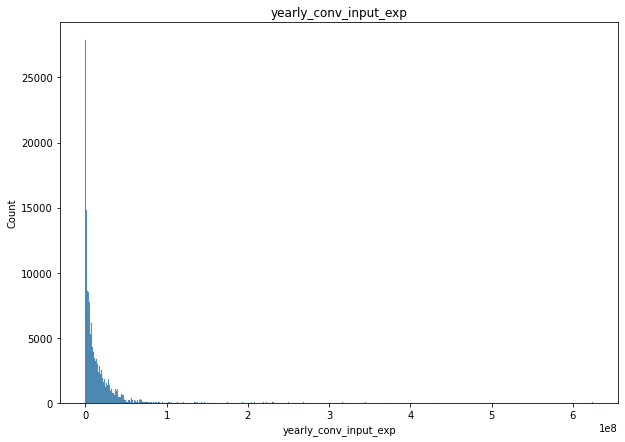

In [88]:
sns.histplot(x='yearly_conv_input_exp', data=soil)
plt.title('yearly_conv_input_exp')
plt.show()

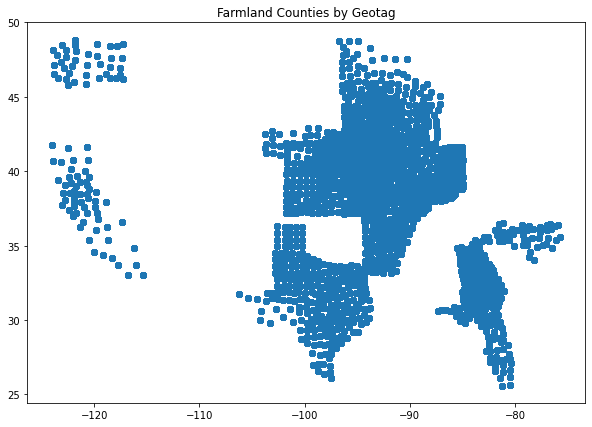

In [89]:
#This is just for fun. Who doesn't like a nice map?
plt.figure()
plt.scatter(soil['Long'], soil['Lat'])
plt.title('Farmland Counties by Geotag')
plt.show()

Ok, we have a good sense of the interactions in our features and a foundation for how each relates to our target variable, "in drought". We know we will have to reduce some of the features prior to fitting a logistic regression. We will write our regular "soil" dataframe to csv and when we import it into our modeling notebook we can drop some columns prior to modeling.

For all of our modeling we will separate away the FIPS, State, and County columns as they mainly serve as labels for us. We can keep them incase we need to reference them. For logistic regression, we will also drop the mintemp, avgtemp, Chem_operations, Fert_operations, and both the chem and fert yearly expense columns to avoid multicollinearity.

For the Decision Tree--we shouldn't need to drop anything in particular, Decision Trees don't care about multicollinearity...insofar as a model cares about anything. That being said, we can try running it with the chemical and fertilizer expenses combined and again with them separate, in case we see a difference in its ability to predict drought.

In [90]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307021 entries, 0 to 307020
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   307021 non-null  object 
 1   FIPS                   307021 non-null  int64  
 2   County                 307021 non-null  object 
 3   State                  307021 non-null  object 
 4   total_Sq_Mi            307021 non-null  float64
 5   in_drought             307021 non-null  int64  
 6   Year                   307021 non-null  int64  
 7   Month                  307021 non-null  int64  
 8   monthly_precip         307021 non-null  float64
 9   mintemp                307021 non-null  float64
 10  maxtemp                307021 non-null  float64
 11  avgtemp                307021 non-null  float64
 12  yearly_chem_dollars    307021 non-null  float64
 13  Chem_operations        307021 non-null  float64
 14  Acres_operated         307021 non-nu

In [91]:
soil.to_csv('soil.csv', index=False)